# CSCE 5210 Fundamentals of AI Project - 1 (Ride Sharing App)

Ashwini Sharma (<https://www.linkedin.com/in/ashwini-sharma-64327b3a/>)


##Environment & Project Details:
Using NetworkX for creating Graph as an environment



*   Number of Nodes: 100 or 200 nodes (as per R3, R4, R5 and R6)
*   Nodes are pickup or drop-off points
*   Edges are bidirectional
*   Edge length: 1 mile
*   Vehicle speed: 30 mph
*   Fleet size: 30 or 60

###Assumptions:
1 Clock tick = 1 minute = 1 complete execution including passenger req, nearest van assignment (req queue update), van scheduling (scheduling queue update)

Distance travelled is .5 miles in 1 clock tick, next node will be considered for calculations in assignment

For 100 nodes, probability values used as .06 & .08

For 200 nodes, probability values used as .04 & .08

*Note: For 100 nodes, project 1 specifies that we should take p as .02 for average connectivity 2, however, with .02 generated graph is not connected graph.
Hence, we have taken .06 which is least to generate connected graph, also .08 instead of .04 for R6*

> *p = .06 provides average connectivity as 4.84*

> *p = .08 provides average connectivity as 6.87*

*For simplicity purpose, this code schedules vans when respective request queue has 3 passengers. If queue has 1 or 2 passengers, code will keep adding passengers to those request queues and once they have 3 passengers, request will be scheduled. Blocks are added for 1 and 2 passengers in request queue, functionality needs thorough testing to implement that feature.*

In [ ]:
import networkx as nx
import random
import math
seed=1000           # seed the graph for reproducibility
nodes = 200         # number of nodes
pval = .08
G= nx.gnp_random_graph (nodes, pval, seed=seed )       # create a random binomial graph, p value is .06
print ( G.nodes() )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


Variable Declaration

In [ ]:
cnt_vans = 60
base_loc = 1
daily_service_hours = 8
loop_upper_limit = (daily_service_hours*60)+1
##loop_upper_limit = 40       #use if need to run for less #ticks
loop_clock_tick = 1
number_of_passenger_per_hour = 600
pass_per_tick = math.ceil(number_of_passenger_per_hour/60)

Checking whether graph is connected or not

In [ ]:
nx.is_connected(G)

True

## Average Connectivity
**100 nodes**

average node connectivity for p=.06 is 4.843838383838384

average node connectivity for p=.08 is 6.870707070707071


**200 nodes**

average node connectivity for p=.04 is 6.54894472361809

average node connectivity for p=.08 is 14.065276381909548

Used function:
nx.average_node_connectivity(G, flow_func=None)

In [ ]:
#nx.average_node_connectivity(G, flow_func=None)

Show all Edges

In [ ]:
print(G.edges())

[(0, 16), (0, 23), (0, 35), (0, 54), (0, 57), (0, 91), (0, 123), (0, 125), (0, 131), (0, 142), (0, 176), (1, 16), (1, 19), (1, 28), (1, 37), (1, 56), (1, 73), (1, 89), (1, 99), (1, 165), (1, 170), (1, 181), (1, 183), (1, 189), (2, 9), (2, 16), (2, 28), (2, 29), (2, 31), (2, 38), (2, 47), (2, 55), (2, 73), (2, 83), (2, 92), (2, 100), (2, 110), (2, 118), (2, 135), (2, 165), (2, 177), (2, 191), (3, 9), (3, 12), (3, 29), (3, 50), (3, 51), (3, 57), (3, 70), (3, 81), (3, 87), (3, 90), (3, 96), (3, 100), (3, 103), (3, 112), (3, 121), (3, 155), (3, 171), (3, 192), (3, 194), (3, 198), (4, 17), (4, 26), (4, 32), (4, 39), (4, 40), (4, 55), (4, 60), (4, 102), (4, 125), (4, 147), (4, 152), (4, 157), (4, 178), (5, 22), (5, 49), (5, 66), (5, 80), (5, 85), (5, 99), (5, 104), (5, 133), (5, 137), (5, 145), (5, 149), (5, 159), (5, 175), (5, 193), (5, 197), (6, 31), (6, 62), (6, 66), (6, 90), (6, 98), (6, 99), (6, 119), (6, 160), (6, 163), (6, 172), (6, 173), (6, 178), (6, 184), (6, 190), (6, 191), (6, 19

Visualize graph with `nodes` nodes. Colors are added based on connectivity.


> '< 2' -- 'tomato'

> '== 2' -- 'lightblue'

> '< 6' -- 'aquamarine'

> '>= 6' -- 'lime'

> else -- 'black'

Below cell reference: provided tutorial

0 11 0.01818181818181818
1 13 0.07692307692307693
2 18 0.0718954248366013
3 20 0.1
4 13 0.0641025641025641
5 15 0.06666666666666667
6 16 0.058333333333333334
7 13 0.11538461538461539
8 20 0.042105263157894736
9 16 0.10833333333333334
10 17 0.11029411764705882
11 20 0.09473684210526316
12 23 0.08695652173913043
13 14 0.054945054945054944
14 18 0.058823529411764705
15 19 0.1111111111111111
16 22 0.047619047619047616
17 21 0.08095238095238096
18 17 0.051470588235294115
19 12 0.06060606060606061
20 19 0.07017543859649122
21 13 0.0641025641025641
22 17 0.058823529411764705
23 19 0.06432748538011696
24 19 0.09941520467836257
25 14 0.0989010989010989
26 20 0.11578947368421053
27 16 0.058333333333333334
28 19 0.08771929824561403
29 20 0.06315789473684211
30 9 0.027777777777777776
31 13 0.14102564102564102
32 18 0.06535947712418301
33 16 0.1
34 20 0.11578947368421053
35 17 0.058823529411764705
36 14 0.08791208791208792
37 16 0.08333333333333333
38 14 0.07692307692307693
39 22 0.0822510822510822

<ipython-input-121-3d5da0bfe5a5>:26: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


{}


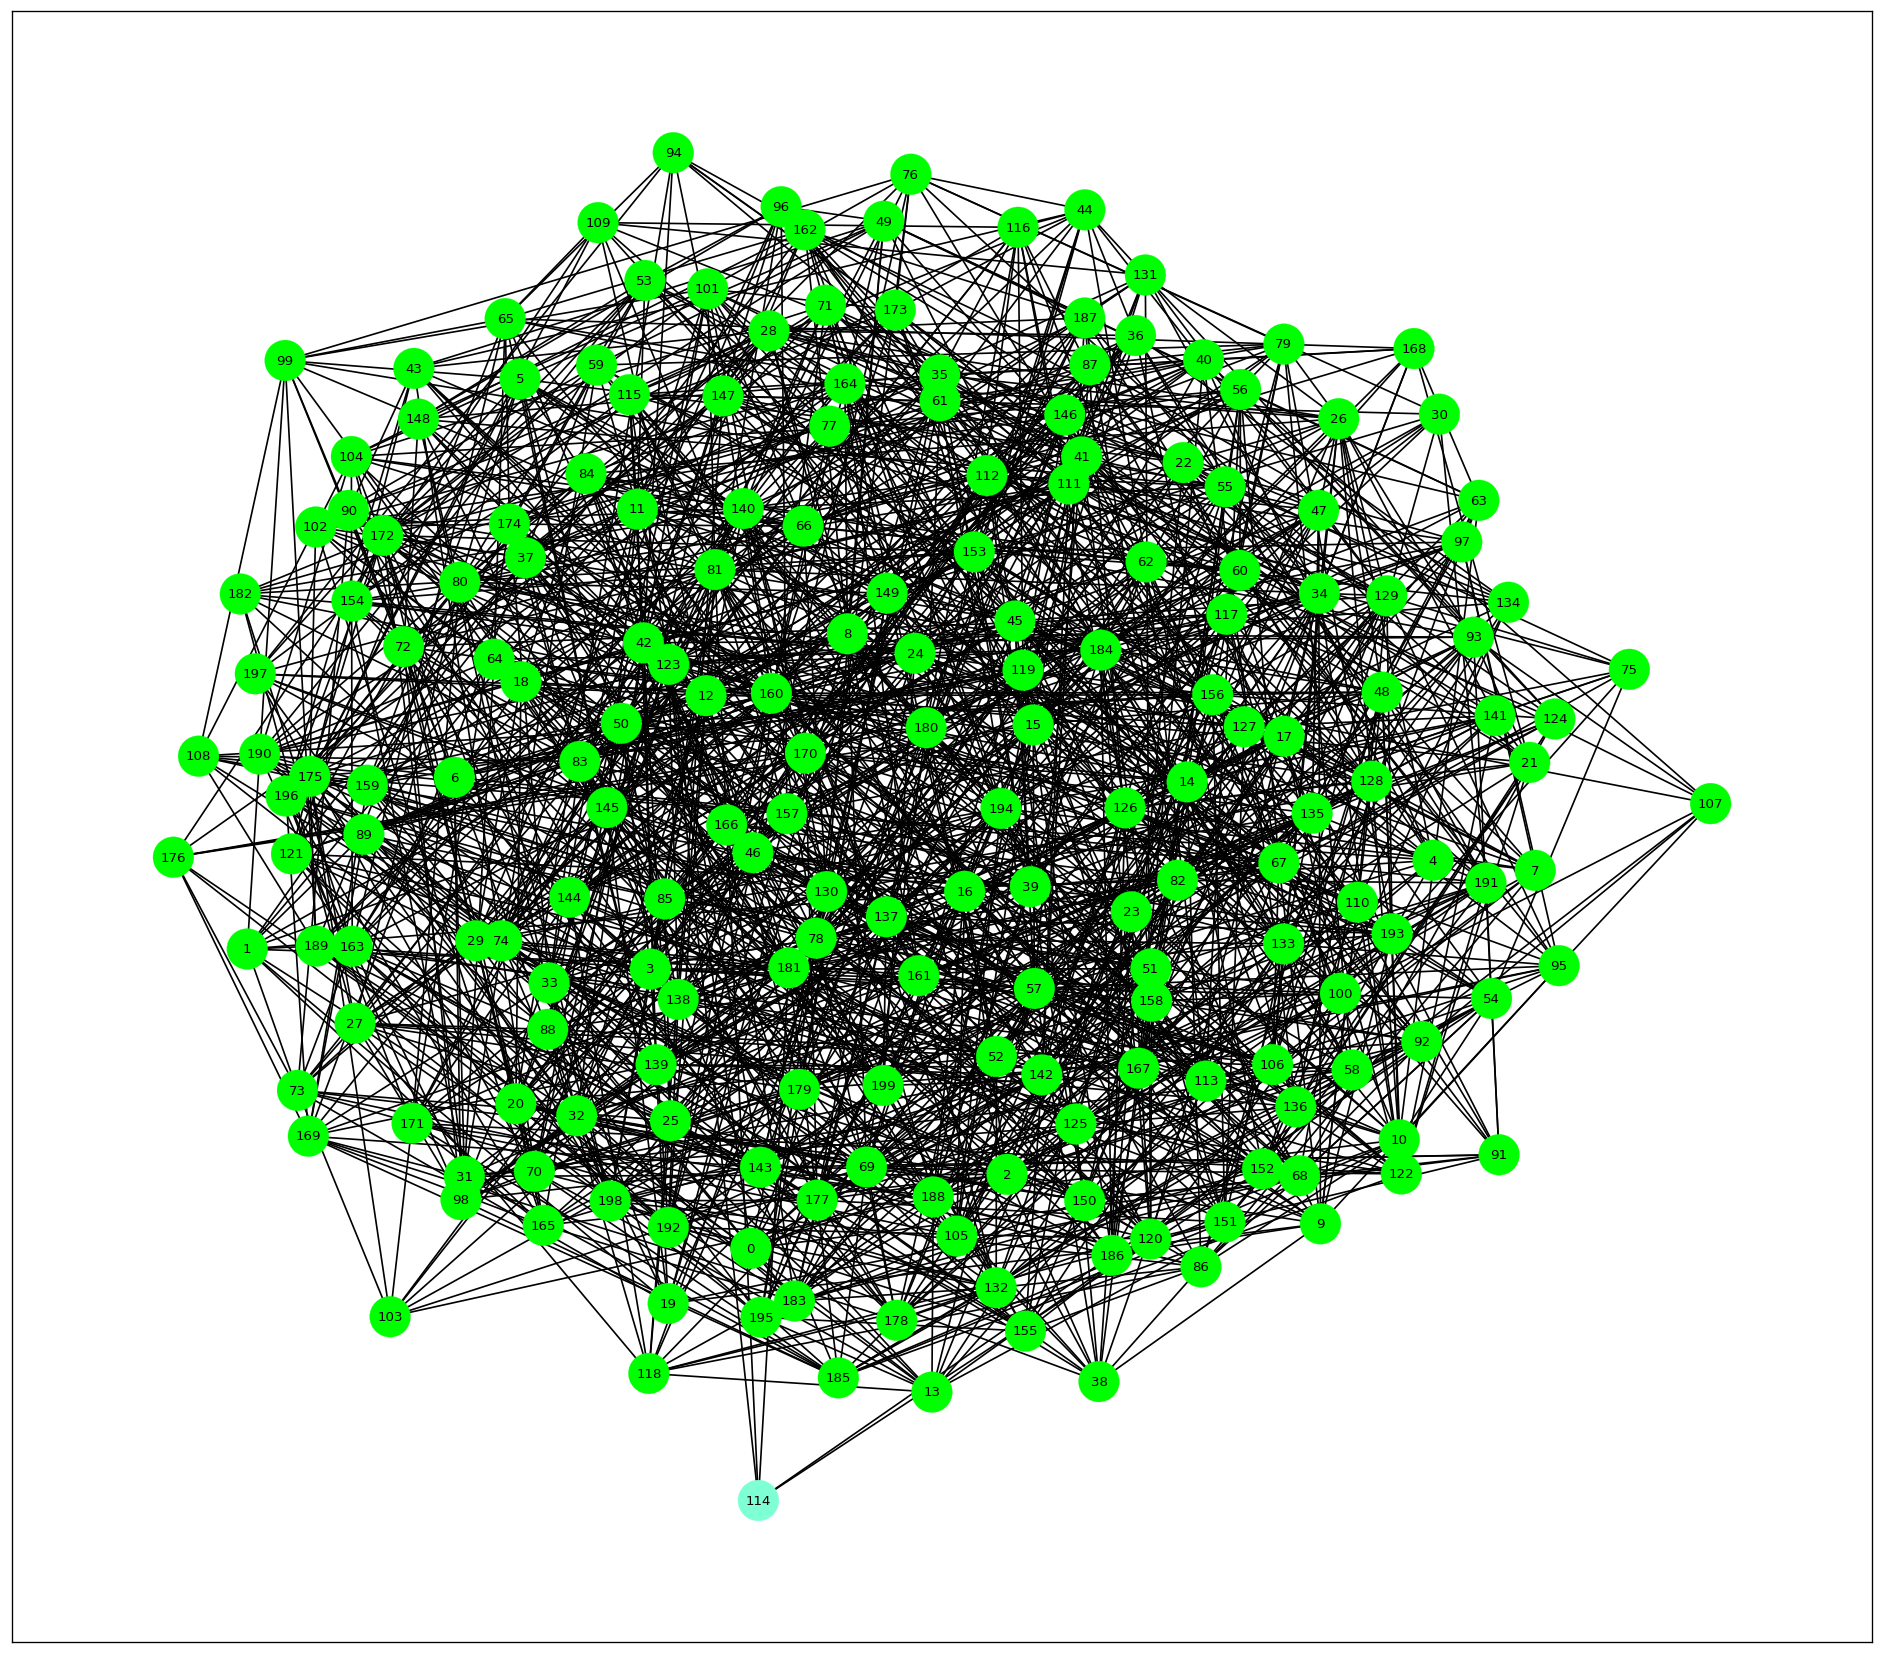

In [ ]:
import numpy as np
import matplotlib.colors as mcolors
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 18), dpi=120)

for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

color_map = []
for v in nx.nodes(G):
    if nx.degree(G, v) < 2:
        color_map.append('tomato')
    elif nx.degree(G, v) == 2:
        color_map.append('lightblue')
    elif nx.degree(G, v) < 6:
        color_map.append('aquamarine')
    elif nx.degree(G, v) >= 6:
        color_map.append('lime')
    else:
        color_map.append('black')

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color=color_map, linewidths=0.15) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=1)                              # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, "weight")
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)


plt.show()

Initializing `cnt_vans` Vans with Base location as `base_loc`

In [ ]:
def init_van_base_loc(cnt_vans, base_loc):
  vans_locs = {}
  upper_limit = cnt_vans + 1
  #each van has details in it's data structure -- vl_1: [location, start_tick, current_path_length, total_path_length, total_trips]
  for cnt in range(1, upper_limit):
    vans_locs['vl_'+str(cnt)] = [base_loc,0,0,0,0]
  return vans_locs


def update_van_loc(vans_locs, van_number, current_tick, van_schedule):
  schedule_purge_req = 0
  start_tick = vans_locs['vl_'+str(van_number)][1]
  node_count = vans_locs['vl_'+str(van_number)][2]
  tick_diff = current_tick - start_tick
  next_node_cnt = math.ceil(tick_diff / 2)
  next_node = van_schedule[next_node_cnt]

  if tick_diff == node_count*2:
    schedule_purge_req = 1

  return next_node, schedule_purge_req


Initializing request queue and scheduling queues for Vans

In [ ]:
def init_van_req_queue(cnt_vans):
  req_queue = {}
  upper_limit = cnt_vans + 1
  for cnt in range(1, upper_limit):
    req_queue['r_v'+str(cnt)] = []
  return req_queue


def init_van_sch_queue(cnt_vans):
  sch_queue = {}
  upper_limit = cnt_vans + 1
  for cnt in range(1, upper_limit):
    sch_queue['s_v'+str(cnt)] = []
  return sch_queue



Generate Passenger requests with pickup and drop as node numbers between 1 & `nodes`

In [ ]:
def GeneratePassengerRequest(pass_count):
  passenger_req = []
  loop_upper = pass_count + 1

  for psg_req in range(1, loop_upper):
    pkdroplist = random.sample(range(1, nodes), 2)
    passenger_req.append(pkdroplist)

  return passenger_req

Searching for nearest van for each passenger and assigning to that Van

In [ ]:
def passengerVanAssignment(pass_queue, van_loc_queue, van_req_queue):
  i = 0
  sch_pass_count = 0
  for passenger in pass_queue:
    i = i + 1
    psg_pickup = passenger[0]
    cnt = 0
    min_length = 0
    min_len_van = 0
    van_curr_count = 0
    for vanlc in van_loc_queue:
      cnt = cnt + 1
      van_curr_count = len(van_req_queue['r_v'+str(cnt)])
      van_seats_available = 3-van_curr_count
      if van_seats_available == 0:
        continue
      else:
        van_curr_location = van_loc_queue['vl_'+str(cnt)][0]
        curr_van_length = nx.astar_path_length(G,van_curr_location,psg_pickup)
        if min_length == 0 or curr_van_length < min_length:
          min_length = curr_van_length
          min_len_van = cnt

    if min_len_van != 0:
      van_req_queue['r_v'+str(min_len_van)].append(passenger)
      sch_pass_count = sch_pass_count + 1

  del pass_queue[0:sch_pass_count]

  return van_req_queue, pass_queue



All possible branches for 3 passengers

In [ ]:
tree_branch = [[1,1,1,1,1,1,0],[1,1,1,2,1,1,0],[1,1,1,2,2,1,0],[1,1,2,1,1,1,0],[1,1,2,2,1,1,0],[1,1,2,2,2,1,0],[1,2,1,1,1,1,0],[1,2,1,2,1,1,0],[1,2,1,2,2,1,0],[1,2,2,1,1,1,0],[1,2,2,2,1,1,0],[1,2,2,2,2,1,0],[1,2,3,1,1,1,0],[1,2,3,1,2,1,0],[1,2,3,2,1,1,0],[1,2,3,2,2,1,0],[1,2,3,3,1,1,0],[1,2,3,3,2,1,0],[1,3,1,1,1,1,0],[1,3,1,1,2,1,0],[1,3,1,2,1,1,0],[1,3,2,1,1,1,0],[1,3,2,1,2,1,0],[1,3,2,2,1,1,0],[1,3,2,2,2,1,0],[1,3,2,3,1,1,0],[1,3,2,3,2,1,0],[1,3,3,1,1,1,0],[1,3,3,2,1,1,0],[1,3,3,2,2,1,0],[2,1,1,1,1,1,0],[2,1,1,2,1,1,0],[2,1,1,2,2,1,0],[2,1,2,1,1,1,0],[2,1,2,2,1,1,0],[2,1,2,2,2,1,0],[2,2,1,1,1,1,0],[2,2,1,2,1,1,0],[2,2,1,2,2,1,0],[2,2,2,1,1,1,0],[2,2,2,2,1,1,0],[2,2,2,2,2,1,0],[2,2,3,1,1,1,0],[2,2,3,1,2,1,0],[2,2,3,2,1,1,0],[2,2,3,2,2,1,0],[2,2,3,3,1,1,0],[2,2,3,3,2,1,0],[2,3,1,1,1,1,0],[2,3,1,1,2,1,0],[2,3,1,2,1,1,0],[2,3,1,2,2,1,0],[2,3,1,3,1,1,0],[2,3,1,3,2,1,0],[2,3,2,1,1,1,0],[2,3,2,1,2,1,0],[2,3,2,2,1,1,0],[2,3,3,1,1,1,0],[2,3,3,1,2,1,0],[2,3,3,2,1,1,0],[3,1,1,1,1,1,0],[3,1,1,2,1,1,0],[3,1,1,2,2,1,0],[3,1,2,1,1,1,0],[3,1,2,2,1,1,0],[3,1,2,2,2,1,0],[3,2,1,1,1,1,0],[3,2,1,2,1,1,0],[3,2,1,2,2,1,0],[3,2,2,1,1,1,0],[3,2,2,2,1,1,0],[3,2,2,2,2,1,0],[3,2,3,1,1,1,0],[3,2,3,1,2,1,0],[3,2,3,2,1,1,0],[3,2,3,2,2,1,0],[3,2,3,3,1,1,0],[3,2,3,3,2,1,0],[3,3,1,1,1,1,0],[3,3,1,1,2,1,0],[3,3,1,2,1,1,0],[3,3,1,2,2,1,0],[3,3,1,3,1,1,0],[3,3,1,3,2,1,0],[3,3,2,1,1,1,0],[3,3,2,1,2,1,0],[3,3,2,2,1,1,0],[3,3,3,1,1,1,0],[3,3,3,1,2,1,0],[3,3,3,2,1,1,0]]

All possible branches for 2 passengers

In [ ]:
tree_branch_2 = [[1,1,1,1,0],[1,2,1,1,0],[1,2,2,1,0],[2,1,1,1,0],[2,2,1,1,0],[2,2,2,1,0]]

Function to get tree

In [ ]:
def create_tree(vl, p1p, p2p, p3p, p1d, p2d, p3d):
  tree_temp = [vl,[p1p,
         [p1d, [p2p,[p2d,[p3p,[p3d]]],[p3p,[p2d,[p3d]],[p3d,[p2d]]]], [p3p,[p3d,[p2p,[p2d]]],[p2p,[p2d,[p3d]],[p3d,[p2d]]]]],
         [p2p, [p1d,[p2d,[p3p,[p3d]]],[p3p,[p2d,[p3d]],[p3d,[p2d]]]], [p2d,[p1d,[p3p,[p3d]]],[p3p,[p1d,[p3d]],[p3d,[p1d]]]], [p3p,[p1d,[p2d,[p3d]],[p3d,[p2d]]],[p2d,[p1d,[p3d]],[p3d,[p1d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]]],
         [p3p, [p1d,[p2p,[p2d,[p3d]],[p3d,[p2d]]],[p3d,[p2p,[p2d]]]], [p2p,[p1d,[p3d,[p2d]],[p2d,[p3d]]],[p2d,[p3d,[p1d]],[p1d,[p3d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]], [p3d,[p1d,[p2p,[p2d]]],[p2p,[p1d,[p2d]],[p2d,[p1d]]]]]
],
[p2p,
 [p2d, [p1p,[p1d,[p3p,[p3d]]],[p3p,[p3d,[p1d]],[p1d,[p3d]]]], [p3p,[p3d,[p1p,[p1d]]],[p1p,[p1d,[p3d]],[p3d,[p1d]]]]],
 [p1p, [p1d,[p2d,[p3p,[p3d]]],[p3p,[p2d,[p3d]],[p3d,[p2d]]]], [p2d,[p1d,[p3p,[p3d]]],[p3p,[p1d,[p3d]],[p3d,[p1d]]]], [p3p,[p1d,[p2d,[p3d]],[p3d,[p2d]]],[p2d,[p1d,[p3d]],[p3d,[p1d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]]],
 [p3p, [p1p,[p1d,[p3d,[p2d]],[p2d,[p3d]]],[p2d,[p3d,[p1d]],[p1d,[p3d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]], [p2d,[p1p,[p3d,[p1d]],[p1d,[p3d]]],[p3d,[p1p,[p1d]]]], [p3d,[p1p,[p2d,[p1d]],[p1d,[p2d]]],[p2d,[p1p,[p1d]]]]]
],
[p3p,
 [p3d, [p1p,[p1d,[p2p,[p2d]]],[p2p,[p2d,[p1d]],[p1d,[p2d]]]], [p2p,[p2d,[p1p,[p1d]]],[p1p,[p1d,[p2d]],[p2d,[p1d]]]]],
 [p1p, [p1d,[p3d,[p2p,[p2d]]],[p2p,[p2d,[p3d]],[p3d,[p2d]]]], [p3d,[p1d,[p2p,[p2d]]],[p2p,[p1d,[p2d]],[p2d,[p1d]]]], [p2p,[p1d,[p2d,[p3d]],[p3d,[p2d]]],[p2d,[p1d,[p3d]],[p3d,[p1d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]]],
 [p2p, [p1p,[p1d,[p3d,[p2d]],[p2d,[p3d]]],[p2d,[p3d,[p1d]],[p1d,[p3d]]],[p3d,[p1d,[p2d]],[p2d,[p1d]]]], [p2d,[p1p,[p3d,[p1d]],[p1d,[p3d]]],[p3d,[p1p,[p1d]]]], [p3d,[p1p,[p2d,[p1d]],[p1d,[p2d]]],[p2d,[p1p,[p1d]]]]]
]
]

  return tree_temp


def create_tree_2psg(vl, p1p, p2p, p1d, p2d):
  tree_2psg = [vl,[p1p,[p1d,[p2p,[p2d]]],[p2p,[p1d,[p2d]],[p2d,[p1d]]]],[p2p,[p2d,[p1p,[p1d]]],[p1p,[p2d,[p1d]],[p2d,[p1d]]]]]

  return tree_2psg


def create_tree_1psg(vl, p1p, p1d):
  tree_1psg = [vl,[p1p,[p1d]]]

  return tree_1psg

Tree for populating selected branch in human understandable format

In [ ]:


van_location = 'van_loc'
psg1_pkp = 'p1_pickup'
psg2_pkp = 'p2_pickup'
psg3_pkp = 'p3_pickup'
psg1_drp = 'p1_drop'
psg2_drp = 'p2_drop'
psg3_drp = 'p3_drop'


tree_hunder = [van_location,[psg1_pkp,
        [psg1_drp, [psg2_pkp,[psg2_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]]], [psg3_pkp,[psg3_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]]]],
        [psg2_pkp, [psg1_drp,[psg2_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]]], [psg2_drp,[psg1_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]]], [psg3_pkp,[psg1_drp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]],[psg2_drp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]]],
        [psg3_pkp, [psg1_drp,[psg2_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]],[psg3_drp,[psg2_pkp,[psg2_drp]]]], [psg2_pkp,[psg1_drp,[psg3_drp,[psg2_drp]],[psg2_drp,[psg3_drp]]],[psg2_drp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]], [psg3_drp,[psg1_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]]]
],
[psg2_pkp,
[psg2_drp, [psg1_pkp,[psg1_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]]], [psg3_pkp,[psg3_drp,[psg1_pkp,[psg1_drp]]],[psg1_pkp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]]]],
[psg1_pkp, [psg1_drp,[psg2_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]]], [psg2_drp,[psg1_drp,[psg3_pkp,[psg3_drp]]],[psg3_pkp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]]], [psg3_pkp,[psg1_drp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]],[psg2_drp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]]],
[psg3_pkp, [psg1_pkp,[psg1_drp,[psg3_drp,[psg2_drp]],[psg2_drp,[psg3_drp]]],[psg2_drp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]], [psg2_drp,[psg1_pkp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]],[psg3_drp,[psg1_pkp,[psg1_drp]]]], [psg3_drp,[psg1_pkp,[psg2_drp,[psg1_drp]],[psg1_drp,[psg2_drp]]],[psg2_drp,[psg1_pkp,[psg1_drp]]]]]
],
[psg3_pkp,
[psg3_drp, [psg1_pkp,[psg1_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg2_drp,[psg1_drp]],[psg1_drp,[psg2_drp]]]], [psg2_pkp,[psg2_drp,[psg1_pkp,[psg1_drp]]],[psg1_pkp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]]],
[psg1_pkp, [psg1_drp,[psg3_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]]], [psg3_drp,[psg1_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]], [psg2_pkp,[psg1_drp,[psg2_drp,[psg3_drp]],[psg3_drp,[psg2_drp]]],[psg2_drp,[psg1_drp,[psg3_drp]],[psg3_drp,[psg1_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]]],
[psg2_pkp, [psg1_pkp,[psg1_drp,[psg3_drp,[psg2_drp]],[psg2_drp,[psg3_drp]]],[psg2_drp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]],[psg3_drp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]], [psg2_drp,[psg1_pkp,[psg3_drp,[psg1_drp]],[psg1_drp,[psg3_drp]]],[psg3_drp,[psg1_pkp,[psg1_drp]]]], [psg3_drp,[psg1_pkp,[psg2_drp,[psg1_drp]],[psg1_drp,[psg2_drp]]],[psg2_drp,[psg1_pkp,[psg1_drp]]]]]
]
]


tree_hunder_2psg = [van_location,[psg1_pkp,[psg1_drp,[psg2_pkp,[psg2_drp]]],[psg2_pkp,[psg1_drp,[psg2_drp]],[psg2_drp,[psg1_drp]]]],
[psg2_pkp,[psg2_drp,[psg1_pkp,[psg1_drp]]],[psg1_pkp,[psg2_drp,[psg1_drp]],[psg2_drp,[psg1_drp]]]]]

tree_hunder_1psg = [van_location,[psg1_pkp,[psg1_drp]]]

Function to find distance for all possible branches from Parent Location
e.g., for first passenger it's van's location, for 2nd child it's first passenger (parent)

In [ ]:
def recursiveRefDistanceParent(nested, idxList, parloc, lgt, lst_path_parent):
    if len(idxList) > 1:
        lgt = lgt + nx.astar_path_length(G,parloc,nested[idxList[0]][0])
        lst_path_parent.append(nx.astar_path(G,parloc,nested[idxList[0]][0]))
        return recursiveRefDistanceParent(nested[idxList[0]], idxList[1:], nested[idxList[0]][0], lgt, lst_path_parent)
    return lgt, lst_path_parent

Function to populate understandable list as p1_pickup and so on

In [ ]:
def recursiveReflst(nested, idxList, dummy_lst):
    if len(idxList) > 1:
        dummy_lst.append(nested[idxList[0]][0])
        #print(lgt)
        return recursiveReflst(nested[idxList[0]], idxList[1:], dummy_lst)
    return dummy_lst

Code to calculate minimum and maximum length paths for all branches (main)

In [ ]:

#initialize van's with base location, pass number of van's & base location, returns dictionary of list for all vans
van_loc_q = init_van_base_loc(cnt_vans, base_loc)

#initialize van's request queue, pass number of van's, returns dictionary of list for all vans
vans_req_q = init_van_req_queue(cnt_vans)

#initialize van's schedule queue, pass number of van's, returns dictionary of list for all vans
vans_sch_q = init_van_sch_queue(cnt_vans)


#main starts
passenger_queue = []

#8 hours loop starts from here: one iteration is 1 minute or 1 tick; total 480 loops in 8 hours (60 per hour)

dict_print_status = {}

for loop_clock_tick in range(1,loop_upper_limit):
  #request to generate passenger pickup and drop nodes, returns list
  pss_generated = GeneratePassengerRequest(int(pass_per_tick))
  passenger_queue.extend(pss_generated)

  print('\nstarting clock tick: ' + str(loop_clock_tick))

  #Assign van to passenger as per proximity and update Van's request queue, returns list of lists for all Van's request queue
  vans_req_q, passenger_queue = passengerVanAssignment(passenger_queue, van_loc_q, vans_req_q)

  #check each van for schedule or increment if already scheduled
  loop_van_number = 0
  for vanlc in van_loc_q:
    loop_van_number = loop_van_number + 1
    van_req_queue_count = len(vans_req_q['r_v'+str(loop_van_number)])
    van_sch_queue_count = len(vans_sch_q['s_v'+str(loop_van_number)])

    #for empty request count no scheduling required, will continue. for non empty scheduling queue van location increament check is required
    if van_req_queue_count == 0 or van_sch_queue_count != 0:
      if van_sch_queue_count != 0:
        next_loc, purge_req = update_van_loc(van_loc_q, loop_van_number, loop_clock_tick, vans_sch_q['s_v'+str(loop_van_number)])
        van_loc_q['vl_'+str(loop_van_number)][0] = next_loc

        #sample print to show status (only for van1), as it was required to show progress
        if loop_van_number == 1:
          if dict_print_status.get(loop_clock_tick) is None:
            print("No action at this tick, moving forward")
          else:
            print(dict_print_status.get(loop_clock_tick))

        #if scheduling is completed for respective van, purging the schedule queue so it participates in next scheduling (van is free)
        if purge_req == 1:
          vans_sch_q['s_v'+str(loop_van_number)].clear()
      continue

    #Below 2 blocks are for scenarios where only 1 or 2 passengers are there in van's request queue.
    #As mentioned in assumptions, currently we are scheduling for 3 passengers for simplicity
    ##elif van_req_queue_count == 1:
      #vl = van_loc_q['vl_'+str(loop_van_number)]
      #p1p = vans_req_q['r_v'+str(loop_van_number)][0][0]
      #p1d = vans_req_q['r_v'+str(loop_van_number)][0][1]

      ##print("only 1 passenger in request queue for van: " + str(vl) + ", not adding to schedule")

    ##elif van_req_queue_count == 2:
      #vl = van_loc_q['vl_'+str(loop_van_number)]
      #p1p = vans_req_q['r_v'+str(loop_van_number)][0][0]
      #p2p = vans_req_q['r_v'+str(loop_van_number)][1][0]
      #p1d = vans_req_q['r_v'+str(loop_van_number)][0][1]
      #p2d = vans_req_q['r_v'+str(loop_van_number)][1][1]

      ##print("only 2 passengers in request queue for van: " + str(vl) + ", not adding to schedule")

    elif van_req_queue_count == 3:
      vl = van_loc_q['vl_'+str(loop_van_number)][0]
      p1p = vans_req_q['r_v'+str(loop_van_number)][0][0]
      p2p = vans_req_q['r_v'+str(loop_van_number)][1][0]
      p3p = vans_req_q['r_v'+str(loop_van_number)][2][0]
      p1d = vans_req_q['r_v'+str(loop_van_number)][0][1]
      p2d = vans_req_q['r_v'+str(loop_van_number)][1][1]
      p3d = vans_req_q['r_v'+str(loop_van_number)][2][1]

      tree = create_tree(vl, p1p, p2p, p3p, p1d, p2d, p3d)

      dummy_lst = []
      lst_path_vl = []
      min_lst_path_vl = []
      lst_path_parent = []
      min_lst_path_parent = []
      max_lst_path_parent = []

      #i=1
      minvl = 0
      minpar = 0
      branch_to_follow_vl = []
      branch_to_follow_par = []
      maxpar = 0
      max_branch_to_follow_par = []

      #calculate distance for each subtree (90 possibilities) and produce optimal path
      for x in tree_branch:
        #generate human readable path
        cur_branch = recursiveReflst(tree_hunder,x,[])

        #calculate distance for each subtree
        distparent, lst_path_parent = recursiveRefDistanceParent(tree,x,vl,0, [])

        #i = i+1

        #find minimum (optimal)
        if minpar == 0 or distparent < minpar:
          minpar = distparent
          branch_to_follow_par = cur_branch
          min_lst_path_parent = lst_path_parent

        #checking maximum as well (for testing purpose only, not using in output)
        if maxpar == 0 or maxpar < distparent:
          maxpar = distparent
          max_branch_to_follow_par = cur_branch
          max_lst_path_parent = lst_path_parent

      #clearing van's request queue
      vans_req_q['r_v'+str(loop_van_number)].clear()


      #optimal path list generation and assignment to schedule queue
      schedule_flat_list = []
      var_cnt=0
      for sublist in min_lst_path_parent:
        if var_cnt>0:
          sublist.pop(0)
        for item in sublist:
          schedule_flat_list.append(item)
        var_cnt= var_cnt+1

      vans_sch_q['s_v'+str(loop_van_number)] = schedule_flat_list

      #display schedule queue for van1 (for illustration prupose to track progress)
      if loop_van_number == 1:
        print('\nDisplay is for only Van-1 progress')
        print("Path to follow: " + str(branch_to_follow_par)+ '\nactual path: ' + str(min_lst_path_parent))
        dict_print_status.clear()
        increment_tick = loop_clock_tick
        sybs = 0

        for x in range(0,6):
          if x == 0:
            subs = 1
          else:
            subs=0

          if len(min_lst_path_parent[x]) == 0:
            increment_tick = increment_tick + 0
          elif len(min_lst_path_parent[x]) == 1:
            increment_tick = increment_tick + 2
          else:
            increment_tick = increment_tick + (len(min_lst_path_parent[x])-subs)*2

          if dict_print_status.get(increment_tick) is None:
            dict_print_status[increment_tick] = []

          dict_print_status[increment_tick].append(branch_to_follow_par[x])

        if dict_print_status.get(loop_clock_tick) is None:
          print("No action at this tick, moving forward")
        else:
          print(dict_print_status.get(loop_clock_tick))

      #update location after scheduling
      van_loc_q['vl_'+str(loop_van_number)][0] = schedule_flat_list[0]
      van_loc_q['vl_'+str(loop_van_number)][1] = loop_clock_tick
      van_loc_q['vl_'+str(loop_van_number)][2] = minpar
      van_loc_q['vl_'+str(loop_van_number)][3] = van_loc_q['vl_'+str(loop_van_number)][3] + minpar
      van_loc_q['vl_'+str(loop_van_number)][4] = van_loc_q['vl_'+str(loop_van_number)][4] + 1


print('\ntotal passenger requests generated: ' + str(loop_clock_tick*10))
print('\nfinally after clock tick: ' + str(loop_clock_tick) + '\npassenger queue has number of passengers as (awaiting): ' + str(len(passenger_queue)))

#print(van_loc_q)




starting clock tick: 1

Display is for only Van-1 progress
Path to follow: ['p1_pickup', 'p2_pickup', 'p2_drop', 'p3_pickup', 'p1_drop', 'p3_drop']
actual path: [[1, 19], [33, 198], [86, 92], [2, 16, 108], [88, 123], []]
No action at this tick, moving forward

starting clock tick: 2
No action at this tick, moving forward

starting clock tick: 3
['p1_pickup']

starting clock tick: 4
No action at this tick, moving forward

starting clock tick: 5
No action at this tick, moving forward

starting clock tick: 6
No action at this tick, moving forward

starting clock tick: 7
['p2_pickup']

starting clock tick: 8
No action at this tick, moving forward

starting clock tick: 9
No action at this tick, moving forward

starting clock tick: 10
No action at this tick, moving forward

starting clock tick: 11
['p2_drop']

starting clock tick: 12
No action at this tick, moving forward

starting clock tick: 13
No action at this tick, moving forward

starting clock tick: 14
No action at this tick, moving 

Final Calculations to answer project questions

In [ ]:
lst = list(van_loc_q.values())
distance = 0
trips = 0
for row in lst:
    distance = distance + (row[3])
    trips = trips + (row[4])

print('\n#Nodes: ' + str(nodes))
print('\np value: ' + str(pval))
print('\n#Vans: ' + str(cnt_vans))
print('\nclock ticks set: ' + str(loop_upper_limit-1))
print('\nclock ticks completed: ' + str(loop_clock_tick))
print('\ntotal passenger requests generated: ' + str(loop_clock_tick*pass_per_tick))
print('\npassenger queue has number of passengers (awaiting): ' + str(len(passenger_queue)))
print('\npassengers served: ' + str((loop_clock_tick*pass_per_tick) - len(passenger_queue)))
print('\ntotal distance covered: ' + str(distance) + " miles")
print("average distance covered: " + str(round((distance/cnt_vans),2)) + " miles")
print('\ntotal trips completed: ' + str(trips))
print("average trips completed : " + str(round((trips/cnt_vans),2)))


#Nodes: 200

p value: 0.08

#Vans: 60

clock ticks set: 480

clock ticks completed: 480

total passenger requests generated: 4800

passenger queue has number of passengers (awaiting): 861

passengers served: 3939

total distance covered: 13531 miles
average distance covered: 225.52 miles

total trips completed: 1255
average trips completed : 20.92


# Fleet size 30, Nodes 100, Connectivity 4.84
Assumption: average node connectivity for p=.06 is 4.84

total passenger requests generated: **4800** (600 per hour and 4800 for 8 hours)

Passengers served: **1701**

Passenger queue has # of passengers after 8 hours (awaiting): **3099**

Total distance covered: 6976 miles
1.   Average distance covered: **232.53** miles

Total trips completed: 539

2.   Average trips completed : **17.97**

Time taken to execute: 4 minutes

# R4 (Fleet size 30, Nodes 200, Connectivity 6.55)
Assumption: average node connectivity for p=.04 is 6.55

1.   The average distance traveled (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?

2.   The average number of trips (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?


Answer: For **30** vans, **200** nodes & avg connectivity of **6.55** with **480** clock ticks

total passenger requests generated: **4800** (600 per hour and 4800 for 8 hours)

Passengers served: **1626**

Passenger queue has # of passengers after 8 hours (awaiting): **3174**

Total distance covered: 6998 miles
1.   Average distance covered: **233.27** miles

Total trips completed: 512

2.   Average trips completed : **17.07**

Time taken to execute: 9 minutes




# R5 (Fleet size 60, Nodes 200, Connectivity 6.55)
Assumption: average node connectivity for p=.04 is 6.55

1.   The average distance traveled (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?

2.   The average number of trips (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?


Answer: For **60** vans, **200** nodes & avg connectivity of **6.55** with **480** clock ticks

total passenger requests generated: **4800** (600 per hour and 4800 for 8 hours)

Passengers served: **3192**

Passenger queue has # of passengers after 8 hours (awaiting): **1608**

Total distance covered: 13829 miles
1.   Average distance covered: **230.48** miles

Total trips completed: 1007
2.   Average trips completed : **16.78**

Time taken to execute: 17 minutes

# R6 (Fleet size 60, Nodes 200, Connectivity 14.06)
Assumption: average node connectivity for p=.08 is 14.06

1.   The average distance traveled (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?

2.   The average number of trips (over the fleet) per day when run on a road network of 200 nodes and average connectivity of 2?


Answer: For **60** vans, **200** nodes & avg connectivity of **14.06** with **480** clock ticks

total passenger requests generated: **4800** (600 per hour and 4800 for 8 hours)

Passengers served: **3939**

Passenger queue has # of passengers after 8 hours (awaiting): **861**

Total distance covered: 13531 miles
1.   Average distance covered: **225.52** miles

Total trips completed: 1255
2.   Average trips completed : **20.92**

Time taken to execute: 34 minutes

Q&A:

What is the new value of the average distance when the booking rate given in R4 is applied? Why does it differ?

Answer:
Average distance is reduced from **230.48** miles to **225.52** miles after increasing average connectivity.

Reason for this, connectivity has been increased between nodes and now vans will have more routes to reach different nodes with shortest path. That's why we are able to serve more passengers with less distance travelled.


# Analysis for 200 Nodes

In this exercise we tried to explore multiple scenarios by changing #nodes as well as fleet size and average connectivity.

In first iteration with 30 vans, we tried to serve 4800 passengers in 8 hours, but were able to serve only **1626** passengers (roughly **34%**). Mostly passengers were waiting in queue to be picked up for scheduling. We completed only **512** trips in 480 ticks (1 tick is 1 minute, total 8 hours).

Once we increased our fleet size from **30** to **60** vans in 2nd iteration, service improved significantly and we were able to serve **3192** passengers out of 4800 (around **67%** ).

In final iteration, where we increased average connectivity from **6.55** to **14.06**, the average distance travelled by vans got reduced and we were able to serve **3939** passengers (**82%**). #Trips also got increased from **1007** to **1255**.
